In [1]:
import pandas as pd

df=pd.read_csv('LCA_FY_2022.csv')
df=df.dropna()
df['State']=df['Worksite'].apply(lambda x: x.split(', ')[1])
df=df[df['Visa_Class']=='H-1B']
df.index = pd.RangeIndex(1, len(df.index) + 1)

In [2]:
title = df['SOC_Title']

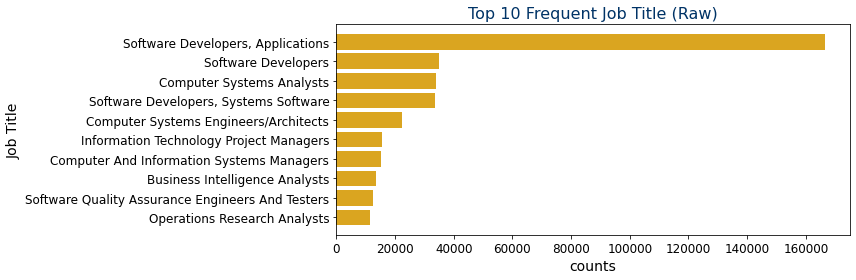

In [3]:
from collections import Counter
import matplotlib.pyplot as plt
counter=Counter(title)

most_common_20 = counter.most_common(10)

top_20_titles=[x[0] for x in most_common_20]
top_20_values=[x[1] for x in most_common_20]


plt.figure(figsize=(12, 4))  
plt.barh(top_20_titles, top_20_values, 
         color='#DAA520')  
plt.xlabel('counts', fontsize=14)  
plt.ylabel('Job Title', fontsize=14) 
plt.title('Top 10 Frequent Job Title (Raw)', fontsize=16, color='#003366')  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.gca().invert_yaxis()  
plt.tight_layout() 
plt.show()

In [4]:
len(set(df['SOC_Title']))

877

In [5]:
df['SOC_Title'] = df['SOC_Title'].replace('Engineers/Architects', 'Engineers Architects', regex=True)

In [6]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from mlxtend.frequent_patterns import apriori, association_rules


def preprocess_and_tokenize(text):
    text = text.translate(str.maketrans('', '', string.punctuation))

    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    stop_words.add('applications')
    words = [word for word in words if word.lower() not in stop_words]

    return words

df['SOC_Title'] = df['SOC_Title'].apply(preprocess_and_tokenize)


In [7]:
df['SOC_Title']

1                             [Software, Developers]
2                             [Mechanical, Drafters]
3                   [Operations, Research, Analysts]
4                                         [Chemists]
5                      [Computer, Systems, Analysts]
                             ...                    
610720    [Computer, Systems, Engineers, Architects]
610721                        [Software, Developers]
610722                       [Automotive, Engineers]
610723    [Computer, Systems, Engineers, Architects]
610724                        [Software, Developers]
Name: SOC_Title, Length: 610724, dtype: object

In [8]:
import numpy as np
titles=df['SOC_Title'].apply(lambda x: np.unique(x))
titles

1                             [Developers, Software]
2                             [Drafters, Mechanical]
3                   [Analysts, Operations, Research]
4                                         [Chemists]
5                      [Analysts, Computer, Systems]
                             ...                    
610720    [Architects, Computer, Engineers, Systems]
610721                        [Developers, Software]
610722                       [Automotive, Engineers]
610723    [Architects, Computer, Engineers, Systems]
610724                        [Developers, Software]
Name: SOC_Title, Length: 610724, dtype: object

In [9]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
title_matrix = mlb.fit_transform(titles)

title_df = pd.DataFrame(title_matrix, columns=mlb.classes_)
title_df


,Abstractors,Abuse,Account,Accountant,Accountants,Accounting,Activities,Actors,Actuaries,Acupuncturists,...,Web,Wellness,Wholesale,Wildlife,Wind,Work,Workers,Writers,Yard,Zoologists
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610719,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
610720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
610721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
610722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
frequent_itemsets = apriori(title_df, min_support=0.01, use_colnames=True)

/Users/yifeizhang/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [11]:
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)


In [12]:
frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) != 1)].reset_index(drop=True).head(10)

,support,itemsets
0,0.386836,"(Software, Developers)"
1,0.125220,"(Systems, Computer)"
2,0.056020,"(Analysts, Systems)"
3,0.056019,"(Analysts, Systems, Computer)"
4,0.056019,"(Analysts, Computer)"
5,0.055220,"(Software, Systems)"
6,0.055216,"(Systems, Developers)"
7,0.055216,"(Software, Systems, Developers)"
8,0.054491,"(Engineers, Computer)"
9,0.050524,"(Information, Managers)"


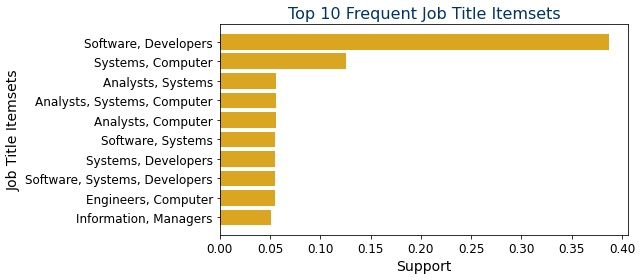

In [13]:
import matplotlib.pyplot as plt
top_20_frequent_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) > 1)].head(10)


top_20_frequent_itemsets['itemsets'] = top_20_frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))


plt.figure(figsize=(9, 4)) 
plt.barh(top_20_frequent_itemsets['itemsets'], top_20_frequent_itemsets['support'], 
         color='#DAA520')  
plt.xlabel('Support', fontsize=14) 
plt.ylabel('Job Title Itemsets', fontsize=14)  
plt.title('Top 10 Frequent Job Title Itemsets', fontsize=16, color='#003366')  
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)  
plt.gca().invert_yaxis() 
plt.tight_layout() 
plt.show()

In [14]:
# last_item=df['SOC_Title'].apply(lambda x:x[-1])

In [15]:
# from collections import Counter

# counter = Counter(last_item)

# most_common_20 = counter.most_common(20)

# top_20_itemsets=[x[0] for x in most_common_20]


In [16]:


# top_10_itemsets = [sorted(item) for item in frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) > 1)].reset_index(drop=True).head(20)['itemsets']]

# def transform_soc_title(title):
#     transformed_title = []
    
#     sorted_title = sorted(title)
    
#     longest_match = {}
    
#     for item in top_10_itemsets:
#         if set(item).issubset(sorted_title):
#             if len(item) > len(longest_match.get(tuple(item), [])):
#                 longest_match[tuple(item)] = item
    
#     if longest_match:
#         transformed_title.extend(longest_match[max(longest_match, key=lambda k: len(longest_match[k]))])
#     else:
#         last_match = {}
#         for item in top_20_itemsets:
#             if item in sorted_title:
#                 last_match[item] = item
#         if last_match:
#             transformed_title.extend(last_match.values())
    
#     if not transformed_title:
#         transformed_title.append("other")
    
#     return ', '.join(transformed_title)

# df['Transformed_SOC_Title'] = df['SOC_Title'].apply(transform_soc_title)

# print(df[['SOC_Title', 'Transformed_SOC_Title']])

In [17]:
# len(df[df['Transformed_SOC_Title']=='other'])/len(df)

In [18]:
df.to_csv('Processed_data.csv',index=False)